# 4. Task

The purpose of this task is to implement an image-based closed control loop. The controller must be in a separate module. The robot and feature extraction could be together in another module 
or in separate modules.

In [10]:
# First we import all the packages needed.
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(linewidth=120, formatter={'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from machinevisiontoolbox.base import *
from machinevisiontoolbox import CentralCamera
from spatialmath.base import *
from spatialmath import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Import of the personalized VisualServo module
import sys
import os
import importlib 
# Notebook directory
notebook_directory = os.path.dirname(os.path.abspath("2_3.ipynb"))

# Name of the module
module_name = 'myvisualservo.py'
module_path = os.path.join(notebook_directory, module_name)

# Check if the module file exists
if os.path.exists(module_path):
    # If the module file exists, use importlib to import the module
    spec = importlib.util.spec_from_file_location(module_name, module_path)
    my_visualservo = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(my_visualservo)
    print(f"{module_name} module imported successfully.")
else:
    # If the module file does not exist, print an error message
    print(f"Error: {module_name}.py does not exist in the notebook directory.")

myvisualservo.py module imported successfully.


An image-based closed control loop refers to a control system where feedback is provided through images or visual data. It involves capturing images of a process or environment, analyzing these images to extract relevant information, and using this information to adjust and control the system. This approach allows for precise and dynamic control in applications such as robotics, industrial automation, and surveillance. In the next image we can see a scheme of the system. 

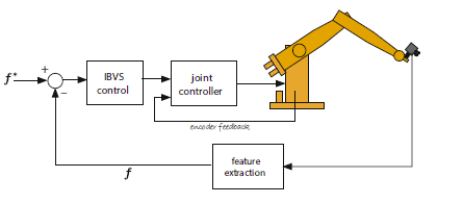

It should be noted that, unlike the PBVS, the IBVS omits the pose estimation
step, and uses the image features directly. Also, the desired camera pose with respect to the goal is defined implicitly by the desired image feature values. IBVS is a challenging control problem since the image features are a highly nonlinear function of camera pose.

Here we define the IBVS_Actuator class, which is a subclass of VisualServo. We attach the class in image format because it is already defined in the ¨myvisualservo¨ module.

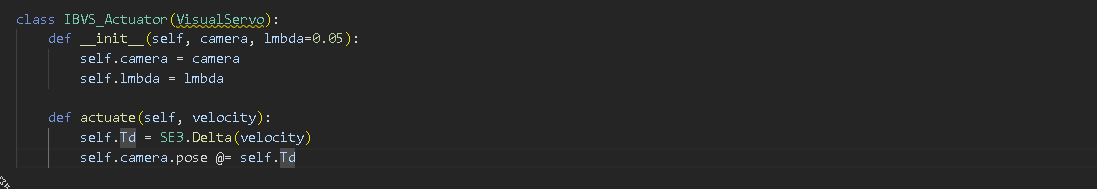

The next class defines the feature extractor module, which is used to extract the features from the image plane.

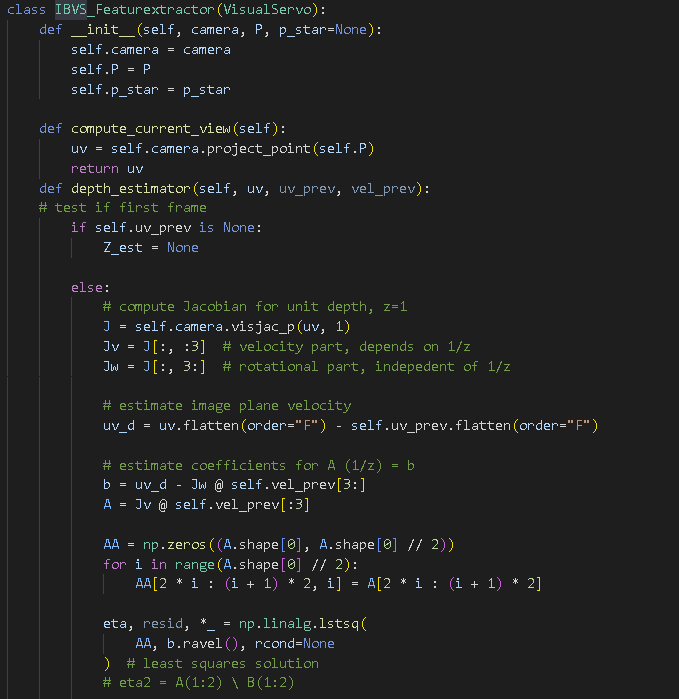

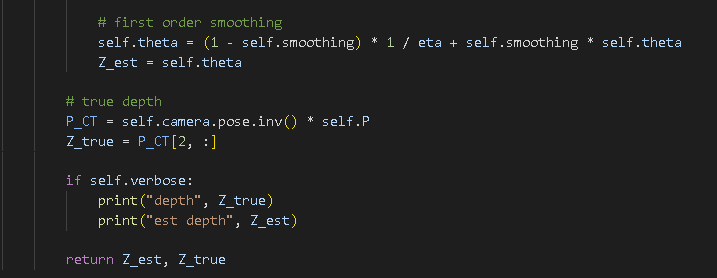

The next cell defines the controller module of the IBVS system.  This controller works by computing the image plane velocity that minimizes the error between the current image plane coordinates and the desired image plane coordinates.

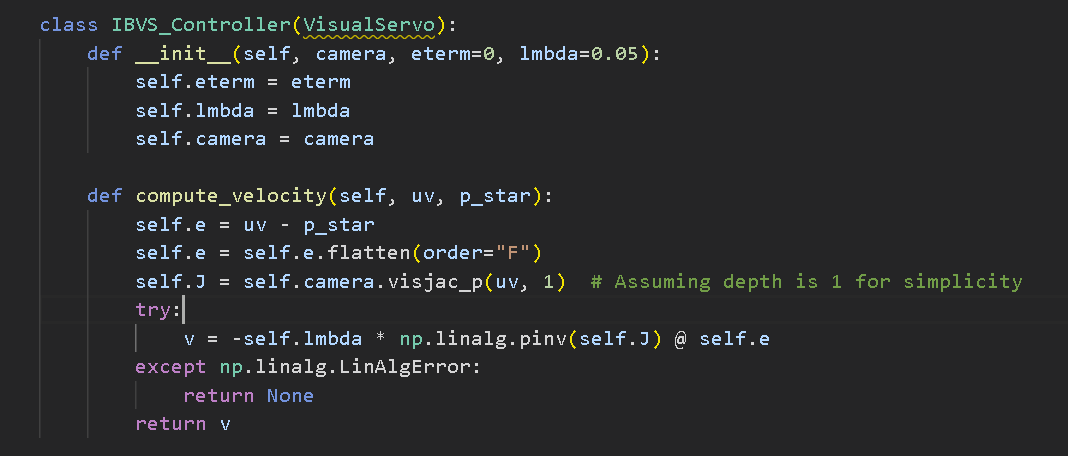

In [12]:
# Goal Object
P = mkgrid(2, side=0.5, pose=SE3.Tz(3));

# desired pose
camera = CentralCamera.Default(pose=SE3.Trans(1, 1, -2));
pd = 200 * np.array([[-1, -1, 1, 1], [-1, 1, 1, -1]]) + np.c_[camera.pp]

# Defining the camera with default intrinsic parameters.
camera = CentralCamera.Default(pose=SE3.Trans(1, 1, -3) * SE3.Rz(0.6));

This is the personalized IBVS class, with the separates components.


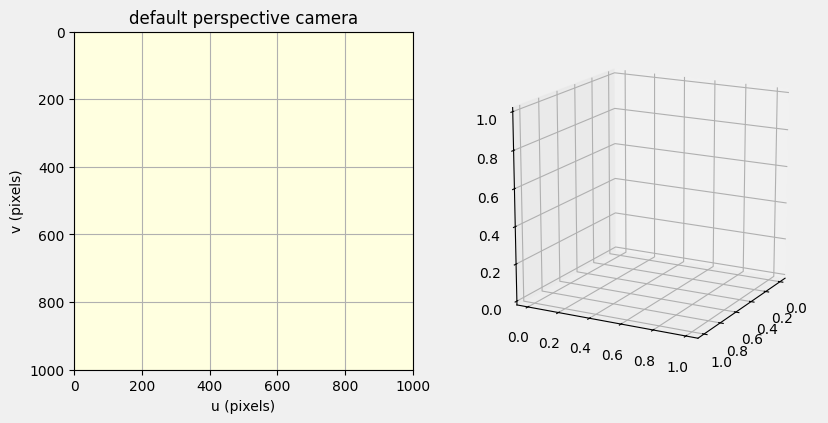

In [13]:
ibvs = my_visualservo.IBVS(camera, P=P, p_d=pd)

In [ ]:
# Run the code
ibvs.run(200)
# Don't show the output of the code to save space of the notebook.

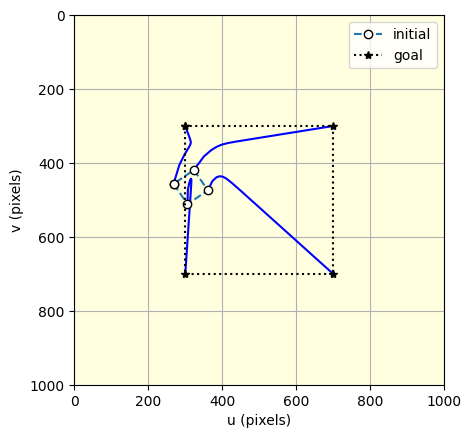

In [15]:
ibvs.plot_p()

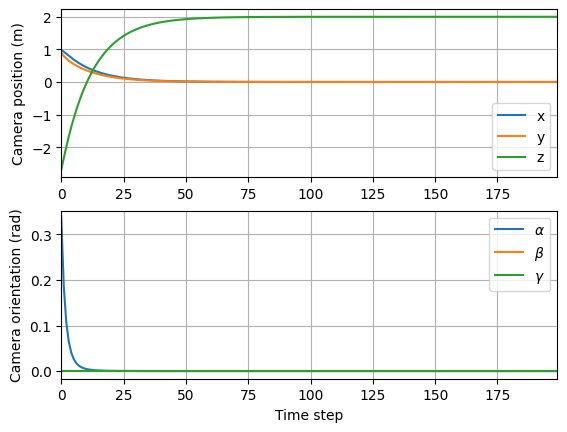

In [16]:
ibvs.plot_pose()

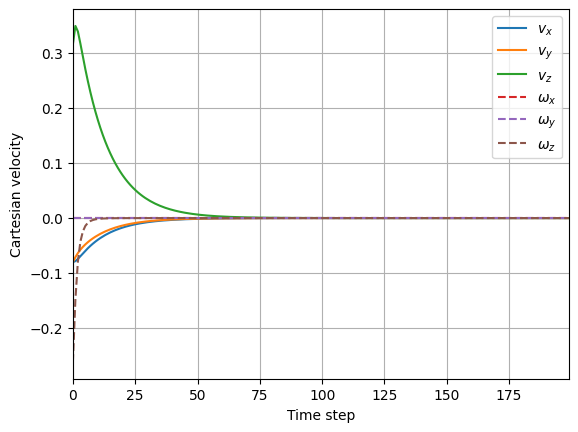

In [17]:
ibvs.plot_vel()